# Proyecto NLP

## Nombre: Pablo Sánchez Cabrera

**En este proyecto se pretende conocer el sentimiento y la temática de cada uno de los comentarios que los parlamentarios norteamericanos viernten en las redes sociales.**

## Importar módulos

In [30]:
import sys
sys.path.append("../")

import pandas as pd
from src.graphs import countplot, histplot
from src.preprocessing import Preprocessing
from src.model.model_task import ClassificationTask
from src.model._utils import group_function

import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [13]:
datos = pd.read_csv("../data/political_social_media.csv")

# Análisis Descriptivo

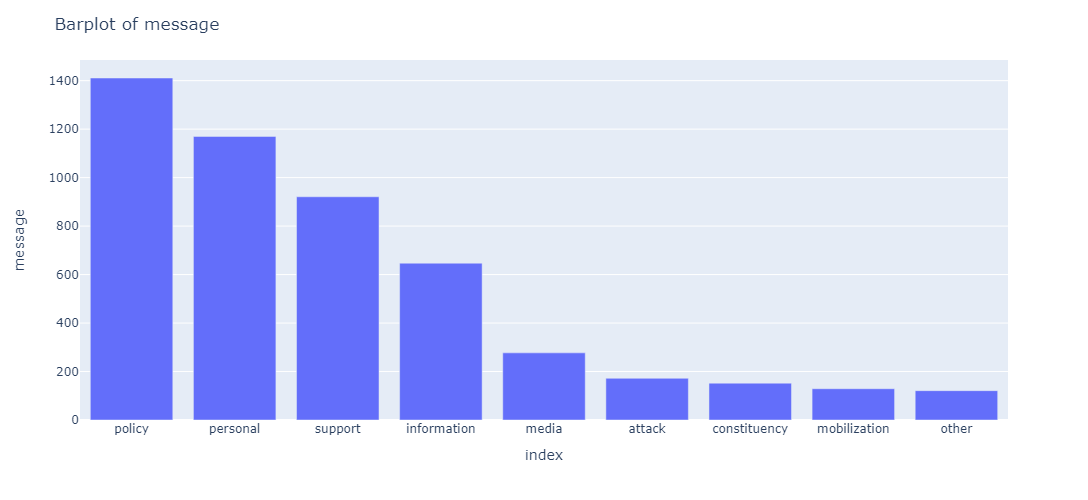

In [14]:
countplot(data=datos,
          target="message",
          static_plot=False)

**Puede verse que más del 50% de los comentarios que vierten los políticos estadounidenses tratan sobre temas políticos o de índole personal. Así, en cerca del 20% utilizan las redes sociales para buscar apoyos para diferentes causas.**

**Por contra, según los datos analizados, parece que apenas hablan sobre temas electorales (estructura, distritos, etc.) o movilización ciudadana**.

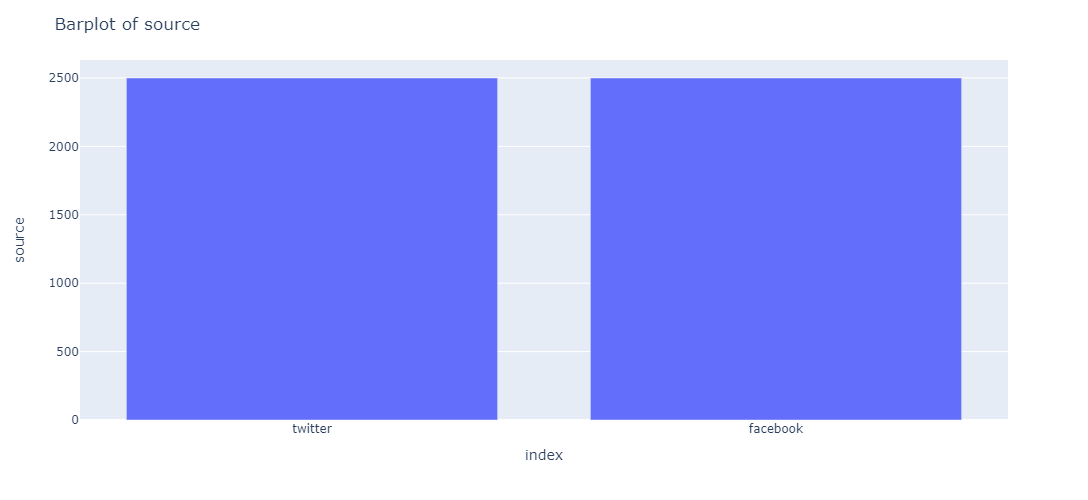

In [15]:
countplot(data=datos,
          target="source",
          static_plot=False)

**En el gráfico anterior, se visualiza la procedencia de los comentarios en las redes sociales. 
Se observa que el contenido que vierten los políticos es homogéneo entre las dos principales redes sociales (twitter, facebook) de la época (2015).**

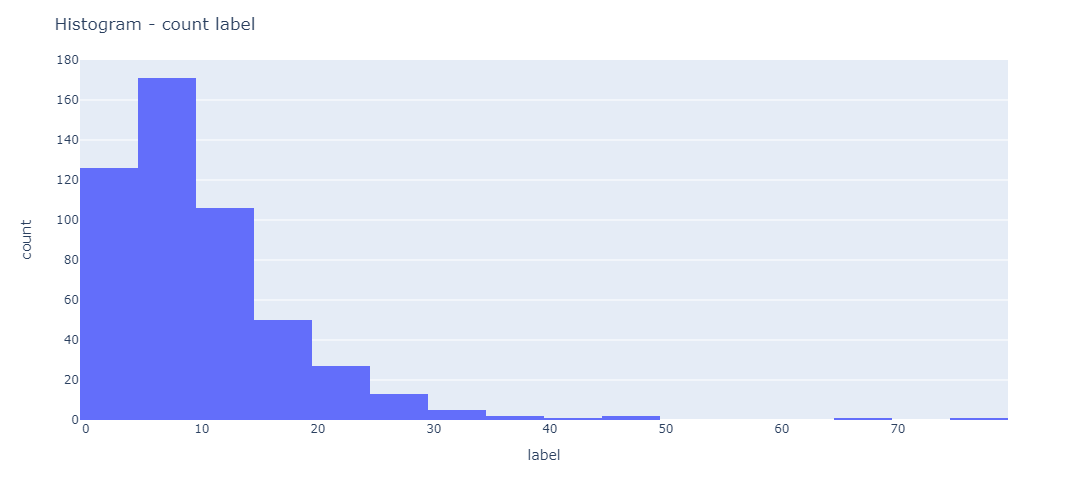

In [16]:
histplot(data=datos, target="label", static_plot=False)

**El histograma nos muestra la distribución de comentarios en las redes por parte de los diferentes políticos. Puede verse que la mayor parte de los políticos no son muy activos en las redes sociales.**

**Se observa que la mediana de la distribución se encuentra cerca de `9` comentarios y es que, como puede verse en el gráfico, no hay se alcanzan ni `10` parlamentarios que vuelquen más de `30` comentarios en las redes sociales.**

# Preprocesado del texto

**Como es sabido, en todo proyecto de NLP es conveniente realizar un preprocesado de los textos. En este caso, se ha implementado un proceso en el que el usuario puede eliminar el tipo de caracteres según considere. Así, permite rechazar las menciones, las urls, los hashtags y otros símbolos (puntos, exclamaciones, ect.) si así lo desea.**

**Otro procedimiento de limpieza de textos muy común es excluir los `stop-words` de las oraciones (usándose el paquete `NLTK`), trabajar en minúsculas o realizar una lematización del mismo. Todos estos procedimientos son facilitados al usuario por si desea realizarlos.**.

**Por último, por si fuera necesario para desarrollos posteriores, se dispone también de una funcionalidad de truncar el texto.**

In [17]:
preprocessing = Preprocessing(mention=True,
                              url=True,
                              hashtags=False,
                              retweet=True,
                              lower=False,
                              lemmatization=False,
                              points=True,
                              stop_words=False,
                              truncate=True,
                              n_truncate=256)

**Al utilizar arquitecturas de Deep Learning para el caso que nos ocupa, no se realiza un procesado del texto muy exhaustivo. Así, únicamente se exlcuyen menciones, urls, hashtags, RTs y se trunca el texto si éste tiene una longitud superior a los `256` caracteres**  

In [18]:
datos = preprocessing.select_columns(datos, columns_name=["_unit_id", "source", "message", "text", "label"])
datos["processing_text"] = preprocessing.preprocessing_data(datos, "text")

## Análisis de Sentimiento

**Para predecir el sentimiento de los comentarios de los políticos, se hace uso de un transformer utilizado para dicha función. Esta arquitectura permite predecir el grado de sentimiento en cinco niveles (muy negativo, negativo, medio, positivo y muy positivo).**

In [19]:
sentimental_analysis = ClassificationTask(task="sentiment-analysis",
                                          model_name="nlptown/bert-base-multilingual-uncased-sentiment")

df_sentiment = sentimental_analysis.get_task(datos, "processing_text", split_num=None, delete_row_character=15)

**En este caso, se considera que comentarios con menos de `15` caracteres no son adecuados para predecir su sentimiento. Por tanto, un total de `45` comentarios son rechazados finalmente**.

**A partir de esta predicción se puede determinar realizar , el sentimiento**

In [20]:
df_sentiment.groupby("label_sentiment").count()

,score_sentiment
label_sentiment,
1 star,1312
2 stars,97
3 stars,247
4 stars,851
5 stars,2448


**Puede verse que el modelo clasifica más del `65%` de los comentarios como positivos (casi un `50%` con la más alta distinción de positividad).
Por su parte, el modelo indica que los comentarios más negativos llegan a superar el `25%`.**

**También puede analizarse el sentido de los comentarios a nivel político. Utilizando la siguiente función, se obtiene una tabla en el que se identifica el porcentaje de comentarios según el grado de sentimiento (muy negativo - muy positivo).**

In [21]:
df_sentiment_politico = group_function(data1=datos,
                                       data2=df_sentiment,
                                       target1="label",
                                       target2="label_sentiment",
                                       n_tweets=10)

Users analysed: 181
Total Users: 505


In [22]:
df_sentiment_politico.sort_values(by=["total_label"]).tail(23)

,label,label_sentiment,total_label_sentiment,total_label,percentage_label_sent_label
86,From: Bernard Sanders (Senator from Vermont),5 stars,18,40,45.000000
85,From: Bernard Sanders (Senator from Vermont),4 stars,6,40,15.000000
82,From: Bernard Sanders (Senator from Vermont),1 star,14,40,35.000000
83,From: Bernard Sanders (Senator from Vermont),2 stars,1,40,2.500000
84,From: Bernard Sanders (Senator from Vermont),3 stars,1,40,2.500000
675,From: John Fleming (Representative from Louisi...,3 stars,2,48,4.166667
674,From: John Fleming (Representative from Louisi...,1 star,13,48,27.083333
676,From: John Fleming (Representative from Louisi...,4 stars,7,48,14.583333
677,From: John Fleming (Representative from Louisi...,5 stars,26,48,54.166667
236,From: Cory Booker (Senator from New Jersey),4 stars,7,49,14.285714


**La tabla anterior presenta el número de comentarios según su sentimiento para los `5` políticos norteamericanos más activos en las redes sociales. Puede verse que, en general, estos políticos mandan mensajes positivos**.

# Predicción de la temática

**Conocer de qué hablan los políticos es de gran relevancia para la ciudadanía. Por ello, se pretende realizar un análisis más exhaustivo del que se dispone inicialmente (como ya vimos, la mayor parte de los comentarios son clasificados como `policy`taset original).**

**Las temáticas planteadas son las siguientes:**

In [23]:
candidate_labels = ['economy finance',
                    'health service',
                    'war military',
                    'violence crime',
                    'inmigration racism',
                    'foreign policy',
                    'public administration',
                    'education school',
                    'other']

**La arquitectura `zero-shot` nos va a permitir clasificar cada uno de los comentarios según la temática -`clasificación multietiqueta`-.**

In [24]:
topic_classification = ClassificationTask(task="zero-shot-classification",
                                          model_name="facebook/bart-large-mnli")

In [32]:
topic_df = topic_classification.get_task(datos, "processing_text",
                                         split_num=100,
                                         labels_topic=candidate_labels,
                                         delete_row_character=15
                                         )

*Nota: en este caso, por temas de rendimiento computacional, únicamente se analizan los 100 primeros comentarios del dataset*

**Se presentan los resultados de varios comentarios a modo de ejemplo**

In [33]:
print(topic_df["sequence"].iloc[0])
topic_df.head(9)

Rep Trey Radel R FL slams Obamacare politics


,sequence,labels,scores
0,Rep Trey Radel R FL slams Obamacare politics,health service,0.848999
1,Rep Trey Radel R FL slams Obamacare politics,other,0.180924
2,Rep Trey Radel R FL slams Obamacare politics,public administration,0.136950
3,Rep Trey Radel R FL slams Obamacare politics,violence crime,0.007708
4,Rep Trey Radel R FL slams Obamacare politics,inmigration racism,0.000818
5,Rep Trey Radel R FL slams Obamacare politics,education school,0.000600
6,Rep Trey Radel R FL slams Obamacare politics,war military,0.000277
7,Rep Trey Radel R FL slams Obamacare politics,economy finance,0.000212
8,Rep Trey Radel R FL slams Obamacare politics,foreign policy,0.000079


In [34]:
print(topic_df["sequence"].iloc[18])
topic_df[18:27]

Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices


,sequence,labels,scores
0,Please join me today in remembering our fallen...,war military,0.183189
1,Please join me today in remembering our fallen...,other,0.093613
2,Please join me today in remembering our fallen...,violence crime,0.005703
3,Please join me today in remembering our fallen...,inmigration racism,0.002645
4,Please join me today in remembering our fallen...,public administration,0.001863
5,Please join me today in remembering our fallen...,foreign policy,0.001114
6,Please join me today in remembering our fallen...,economy finance,0.000762
7,Please join me today in remembering our fallen...,education school,0.000713
8,Please join me today in remembering our fallen...,health service,0.000136


In [35]:
print(topic_df["sequence"].iloc[45])
topic_df[45:57]

Called on the  to release info about inspections before the CasseltonDerailment to review quality of rails 12


,sequence,labels,scores
0,Called on the to release info about inspectio...,public administration,0.814604
1,Called on the to release info about inspectio...,other,0.102431
2,Called on the to release info about inspectio...,economy finance,0.072971
3,Called on the to release info about inspectio...,health service,0.066629
4,Called on the to release info about inspectio...,education school,0.019892
5,Called on the to release info about inspectio...,war military,0.016453
6,Called on the to release info about inspectio...,violence crime,0.012454
7,Called on the to release info about inspectio...,inmigration racism,0.004970
8,Called on the to release info about inspectio...,foreign policy,0.001855
0,help us keep the kidnapped Nigerian school gir...,education school,0.364432


In [36]:
print(topic_df["sequence"].iloc[81])
topic_df[81:90]

Great oped by Pres Clinton about signing FMLA 20 yrs ago today an important law protecting workers  HoyerHeadlines


,sequence,labels,scores
0,Great oped by Pres Clinton about signing FMLA ...,public administration,0.268942
1,Great oped by Pres Clinton about signing FMLA ...,health service,0.045227
2,Great oped by Pres Clinton about signing FMLA ...,other,0.018031
3,Great oped by Pres Clinton about signing FMLA ...,economy finance,0.003583
4,Great oped by Pres Clinton about signing FMLA ...,education school,0.001248
5,Great oped by Pres Clinton about signing FMLA ...,violence crime,0.001172
6,Great oped by Pres Clinton about signing FMLA ...,war military,0.000301
7,Great oped by Pres Clinton about signing FMLA ...,inmigration racism,0.000195
8,Great oped by Pres Clinton about signing FMLA ...,foreign policy,0.000061


**Como puede verse, el modelo utilizado proporciona aceptables resultados.**

## Futuro caso de uso

**Con este enfoque, podría plantearse abordar un perfilado de los clientes según los mensajes que se dispongan de los mismos (ya sea en una red social o en cualquier otro medio**

**Poder realizar un perfilado de los clientes otorga un valor añadido a su relación con la compañía de forma que abordar el uso de toda la información no estructurada disponible en sus propios sistemas se hace, hoy en día, imprescindible.**